# Advanced robotics & Robotics Systems
**Homework Assignment 3**
# BY:
# Suliman Badour
# Amer Al Badr
# Mohamad Al Mdfaa 

Import libraries and define Rotation and Translation matrices

In [430]:
import numpy as np
import math
pi = math.pi
from numpy.linalg import multi_dot, inv, pinv
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, combinations
from numpy.random import uniform
import matplotlib.patches as mp

In [431]:
def trotx(q):
    Tx = np.array([[1,         0,          0, 0],
                   [0, np.cos(q), -np.sin(q), 0],
                   [0, np.sin(q),  np.cos(q), 0],
                   [0,         0,          0, 1]], dtype = float)
    return Tx

def troty(q):
    Ty = np.array([[ np.cos(q), 0, np.sin(q),  0],
                   [         0, 1,         0,  0],
                   [-np.sin(q), 0, np.cos(q),  0],
                   [         0, 0,         0,  1]], dtype = float)
    return Ty

def trotz(q):
    Tz = np.array([[np.cos(q), -np.sin(q),   0, 0],
                   [np.sin(q),  np.cos(q),   0, 0],
                   [        0,            0, 1, 0],
                   [        0,            0, 0, 1]], dtype = float)
    return Tz

In [432]:
def translx(q):
    Tx = np.array([[1, 0, 0, q],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]], dtype = float)
    return Tx

def transly(q):
    Ty = np.array([[1, 0, 0, 0],
                   [0, 1, 0, q],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]], dtype = float)
    return Ty

def translz(q):
    Tz = np.array([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, q],
                   [0, 0, 0, 1]], dtype = float)
    return Tz

def dtrotx(q):
    dTx = np.array([[0,         0,          0,  0],
                   [ 0, -np.sin(q), -np.cos(q), 0],
                   [ 0,  np.cos(q), -np.sin(q), 0],
                   [ 0,         0,          0,  0]], dtype = float)
    return dTx

def dtroty(q):
    dTy = np.array([[-np.sin(q), 0, np.cos(q), 0],
                   [          0, 0,         0, 0],
                   [ -np.cos(q), 0,-np.sin(q), 0],
                   [          0, 0,         0, 0]], dtype = float)
    return dTy

def dtrotz(q):
    dTz = np.array([[-np.sin(q), -np.cos(q), 0, 0],
                   [ np.cos(q),  -np.sin(q), 0, 0],
                   [        0,            0, 0, 0],
                   [        0,            0, 0, 0]], dtype = float)
    return dTz

def dtranslx(q):
    dTx = np.array([[0, 0, 0, 1],
                   [ 0, 0, 0, 0],
                   [ 0, 0, 0, 0],
                   [ 0, 0, 0, 0]], dtype = float)
    return dTx

def dtransly(q):
    dTy = np.array([[0, 0, 0, 0],
                   [ 0, 0, 0, 1],
                   [ 0, 0, 0, 0],
                   [ 0, 0, 0, 0]], dtype = float)
    return dTy

def dtranslz(q):
    dTz = np.array([[0, 0, 0, 0],
                   [ 0, 0, 0, 0],
                   [ 0, 0, 0, 1],
                   [ 0, 0, 0, 0]], dtype = float)
    return dTz

In [433]:
#Forward kinematics
def fk( q_a, theta, length):
    l1, l2 = length[0], length[1] 
    T_tool = multi_dot([translz(l1) ,trotz(q_a[0]), trotz(theta[0]), translz(q_a[1]), translz(theta[1]), transly(l2), transly(q_a[2]), transly(theta[2])])
    return T_tool

In [434]:
#Inverse kinematics
def ik(end_pos, length):
    l1, l2 = length[0], length[1]
    xe, ye, ze = end_pos

    q1 = np.arctan2(xe, ye)
    q2 = ze - l1
    q3 = np.sqrt(xe**2+ ye**2) - l2 

    return [q1, q2, q3] 

In [435]:
#Jacobian estimation function
#translz(l1) ,trotz(q_a[0]), trotz(theta[0]), translz(q_a[1]), translz(theta[1]), transly(l2), transly(q_a[2]), transly(theta[2])
def Jacob( q_a, theta, length):
    l1, l2 = length
    T = fk(q_a, theta, length)
    T[0:3, 3] = 0
    T_inv = np.transpose(T)
    T1 = multi_dot([translz(l1),trotz(q_a[0]), dtrotz(theta[0]), translz(q_a[1]), translz(theta[1]), transly(l2), transly(q_a[2]), transly(theta[2]), T_inv])
    J1 = np.array([[T1[0, 3]], [T1[1, 3]], [T1[2, 3]], [T1[2, 1]], [T1[0, 2]], [T1[1, 0]]], dtype = float)

    T2 = multi_dot([translz(l1),trotz(q_a[0]), trotz(theta[0]), translz(q_a[1]), dtranslz(theta[1]), transly(l2), transly(q_a[2]), transly(theta[2]), T_inv])
    J2 = np.array([[T2[0, 3]], [T2[1, 3]], [T2[2, 3]], [T2[2, 1]], [T2[0, 2]], [T2[1, 0]]], dtype = float)

    T3 = multi_dot([translz(l1),trotz(q_a[0]), trotz(theta[0]), translz(q_a[1]), translz(theta[1]), transly(l2), transly(q_a[2]), dtransly(theta[2]), T_inv])
    J3 = np.array([[T3[0, 3]], [T3[1, 3]], [T3[2, 3]], [T3[2, 1]], [T3[0, 2]], [T3[1, 0]]], dtype = float) 

    Jac_q = np.hstack((J1, J2, J3))
    return Jac_q[0:3, 0:3]

In [436]:
#Calculate deflections function
def calc_defl(K_theta, J_theta, W):
    K_theta_inv = inv(K_theta)
    dt = multi_dot([J_theta, K_theta_inv, np.transpose(J_theta), W])
    return dt.reshape(-1, )

In [437]:
#Generate random data for experiments
def generate_data(lq1, hq1, lq2, hq2, lq3, hq3, force_lim):
    q1 = uniform(lq1, hq1)
    q2 = uniform(lq2, hq2)
    q3 = uniform(lq3, hq3)
    q_a = [q1, q2, q3]
    w = uniform(-force_lim, force_lim, 6 )
    print(w[0:3])
    return q_a, w[0:3]

In [438]:
# Initial parameters

lengths = [0.4, 0.1]
thetas = [0, 0, 0]

# Stiffness matrix
ka1 = 1*10**6
ka2 = 2*10**6
ka3 = 0.5*10**6

# K_theta before calibration
K_theta = np.array([[ka1, 0, 0],
                    [0, ka2, 0],
                    [0, 0, ka3]], dtype = float)

#Define noise parameters
mean, std =0, 1e-5 


In [439]:
#Elastostatic Calibration

#Generating data( With Noise)
N_exp = 30
A11, A12 = 0, 0
for i in range (0, 1):
    #generate the data
    q_a, W = generate_data(-pi, pi, 0, 0.5, 0, 0.5, 1000)
    #define Jacobian
    J_theta = Jacob(q_a, thetas, lengths)
    #def displacement 
    dt = calc_defl(K_theta, J_theta, W) + np.random.normal(mean, std)
    A = np.zeros((J_theta.shape), dtype = float)
    for col in range (A.shape[1]):
        A[:, col] = np.outer(J_theta[:, col], J_theta[:, col]).dot(W)
    A11 += inv(multi_dot([np.transpose(A), A]))
    A12 += multi_dot([np.transpose(A), dt])

[-201.15899632 -890.71452495  987.26439996]


In [440]:
#Updating K_theta (MSE method)
K_hat = A11.dot(A12)
K_act_upd = np.divide(1, K_hat)
ku1, ku2, ku3 = K_act_upd

K_theta_calibr = np.array([[ku1, 0, 0],
                           [0, ku2, 0],
                           [0, 0, ku3]], dtype = float)
print(K_theta_calibr)

[[ 965752.38055252       0.               0.        ]
 [      0.         2030708.18473375       0.        ]
 [      0.               0.          496161.56491136]]


In [441]:
# Desired trajectory

#Radius of desired trajc
R = 4
# Center Point 
xc, yc, zc = 0, 0, lengths[0]

In [442]:
#Desired applied Force
Force = np.array([600, 400, 1000], dtype= float)
Force = Force.reshape(-1, 1)
N_pts = N_exp

In [443]:
# Generate points of the circle 
ang = np.linspace(0, 2*np.pi, N_pts, dtype = float)

In [444]:
#Collect point on circle line 
xp = xc + R*np.cos(ang)
yp = yc + R*np.sin(ang)
zp = zc*np.ones(N_pts, dtype = float)
des_tr = np.stack([xp, yp, zp])

In [445]:
# Solve inverse kinematics for each point of desired trajectory
Q_des = np.zeros((3, N_pts))
for i in range(N_pts):
    Q_des[:,i] = ik([xp[i], yp[i], zp[i]], lengths)

In [446]:
#Define the uncalibrated trajectory
uncalibrated_trajc = np.zeros(des_tr.shape, dtype = float)
for i in range(N_pts):
    #Calculate jacobian with given configuration
    J1 = Jacob(Q_des[:,i], thetas, lengths)
    dt1 = calc_defl(K_theta_calibr, J1, Force) + np.random.normal(mean, std)
    uncalibrated_trajc[:,i] = dt1 + des_tr[:,i]

In [447]:
# Update desired trajectory 
diff =   des_tr - uncalibrated_trajc
des_tr_upd = des_tr + diff

In [448]:
#Update Q
Q_des_upd = np.zeros((3, N_pts))
for i in range(N_pts):
    Q_des_upd[:,i] = ik([des_tr_upd[0,i], des_tr_upd[1,i], des_tr_upd[2,i]], lengths)

In [449]:
#Calibrated trajectory
calibrated_trajc = np.zeros(des_tr.shape, dtype = float)
for i in range(N_pts):
    #Calculate jacobian with given configuration
    J2 = Jacob(Q_des_upd[:,i], thetas, lengths)
    dt2 = calc_defl(K_theta_calibr, J2, Force) + np.random.normal(mean, std)
    calibrated_trajc[:,i] = dt2 + des_tr_upd[:,i]

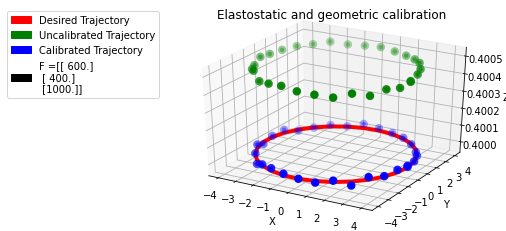

In [450]:
#PLOT
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Elastostatic and geometric calibration")
ax.plot3D(des_tr[0], des_tr[1], des_tr[2], c='red', linewidth = 4)
ax.scatter3D(uncalibrated_trajc[0], uncalibrated_trajc[1], uncalibrated_trajc[2], c = 'green', linewidth = 4)
ax.scatter3D(calibrated_trajc[0],calibrated_trajc[1], calibrated_trajc[2], c = 'blue', linewidth = 4)
#Legends in patch form 
des_leg = mp.Patch(color='red', label='Desired Trajectory')
uncalibr_leg = mp.Patch(color='green', label='Uncalibrated Trajectory')
calibr_leg = mp.Patch(color='blue', label='Calibrated Trajectory')
force_leg = mp.Patch(color='black', label='F =' + str(Force))
plt.legend(handles=[des_leg, uncalibr_leg, calibr_leg, force_leg],loc='upper right', bbox_to_anchor=(0, 1))
plt.show()